In [3]:
import batman
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import scipy.optimize as spicy

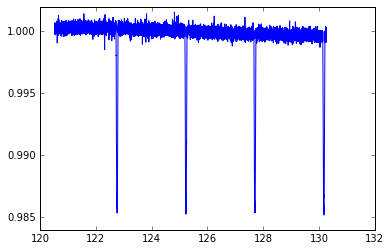

In [25]:
import astropy.io.ascii
table = astropy.io.ascii.read('kepler1b.txt')
time = table['time']
flux = table['flux']
nflux = flux/np.median(flux)
uncertainty = table['uncertainty']
plt.plot(time, nflux)
timepart = time[3000:3500]
fluxpart = nflux[3000:3500]
sigmapart = uncertainty[3000:3500]

In [20]:
def batmanCurveFit(xdata, t0, rp0):
    params = batman.TransitParams()
    params.t0 = t0                      #time of inferior conjunction
    params.per = 2.47061317              #orbital period
    params.rp = rp0                   #planet radius (in units of stellar radii)
    params.a = 7.903                     #semi-major axis (in units of stellar radii)
    params.inc = 83.872                  #orbital inclination (in degrees)
    params.ecc = 0.0                     #eccentricity
    params.w = 0.0                       #longitude of periastron (in degrees)
    params.u = [0.1, 0.3]                #limb darkening coefficients
    params.limb_dark = "quadratic"       #limb darkening model


    m = batman.TransitModel(params, xdata)
    flux = m.light_curve(params)
    return flux

(0.98, 1.01)

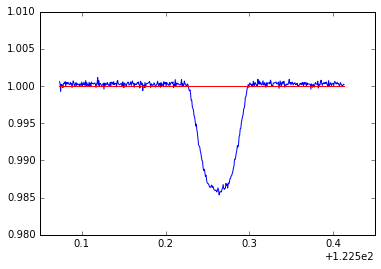

In [27]:
fitThis = spicy.curve_fit(batmanCurveFit, timepart, fluxpart, p0 = [1.0, 1.0], sigma = sigmapart)
xbest, ybest = fitThis[0]
plt.plot(timepart, fluxpart)
plt.plot(timepart, batmanCurveFit(timepart, xbest, ybest), color = 'red')

#plt.xlim(122, 124)
plt.ylim(0.98, 1.01)

In [31]:
print fluxpart

     flux     
--------------
 1.00059317303
 1.00032898672
0.999259779878
 1.00020187822
 1.00000249232
 1.00015203174
0.999785660167
 1.00034643299
 1.00039378714
 1.00034144834
           ...
 1.00034643299
 1.00018443195
 0.99994516888
 1.00026169398
 1.00046855684
 1.00022430913
  1.0000947083
0.999985046058
 1.00004486183
 1.00023427842
 1.00021433983
Length = 500 rows
